In [2]:
#!pip3 install shapely

In [3]:
from shapely import Point, LineString

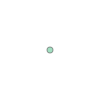

In [4]:
point = Point(2,3)
point3D = Point(5, 2, -1)
point

In [5]:
print(point)
print(point3D)

POINT (2 3)
POINT Z (5 2 -1)


In [6]:
point.wkt

'POINT (2 3)'

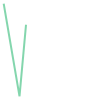

In [7]:
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)

line = LineString([ point1, point2, point3 ])
line

In [8]:
line.wkt

'LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)'

In [9]:
list(line.coords)

[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

In [10]:
xcoords, ycoords = list(line.xy[0]), list(line.xy[1])
print(xcoords, ycoords)

[2.2, 7.2, 9.26] [4.2, -25.1, -2.456]


In [11]:
length = line.length
centroid = line.centroid

print(length)
print(centroid)

52.46106912939557
POINT (6.229961354035622 -11.892411157572392)


In [12]:
from shapely import Polygon

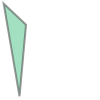

In [13]:
polygon = Polygon([point1, point2, point3])
polygon

In [14]:
polygon.wkt

'POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))'

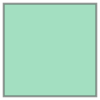

In [15]:
exterior = [(1, 1), (4, 1), (4, 4), (1, 4)]
hole = [(2, 2), (3, 2), (3, 3), (2, 3)]

poly_without_hole = Polygon(shell=exterior)
poly_without_hole

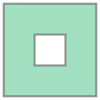

In [16]:
poly_with_hole = Polygon(shell=exterior, holes=[hole])
poly_with_hole

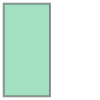

In [17]:
from shapely.geometry import box

box_poly = box(minx = 10, miny = 10, maxx = 30, maxy = 50)
box_poly

In [18]:
box_poly.wkt

'POLYGON ((30 10, 30 50, 10 50, 10 10, 30 10))'

In [19]:
import os

os.getcwd()

'/Users/rujalshrestha/Projects/mac-migration/gisc-412/pythongis'

In [20]:
!pip3 install geopandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [21]:
import geopandas as gpd

In [22]:
data = gpd.read_file('./data/austin_pop_2019.gpkg')

In [23]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [24]:
data.head()

,pop2019,tract,geometry
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3..."
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.33 33..."
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3..."
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3..."
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3..."


<Axes: >

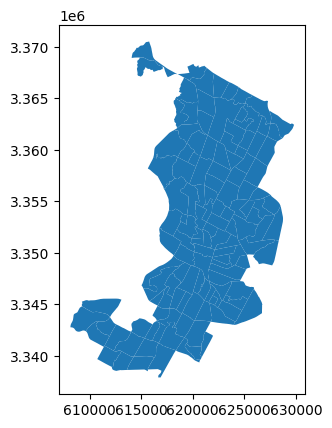

In [25]:
data.plot()

In [26]:
data.shape

(130, 3)

In [27]:
data.tract.nunique()

130

In [28]:
data.pop2019.sum()

np.float64(611935.0)

In [29]:
type(data.geometry)

geopandas.geoseries.GeoSeries

In [30]:
data.geometry.area

0      4.029772e+06
1      1.532030e+06
2      3.960344e+06
3      2.181762e+06
4      2.431208e+06
           ...     
125    2.321182e+06
126    4.388407e+06
127    1.702764e+06
128    3.540893e+06
129    2.054702e+06
Length: 130, dtype: float64

In [31]:
data["area_km2"] = data.area / 1000000
data.head()

,pop2019,tract,geometry,area_km2
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3...",4.029772
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.33 33...",1.532030
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3...",3.960344
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3...",2.181762
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3...",2.431208


<Axes: >

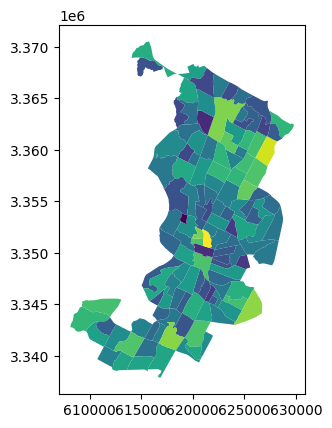

In [32]:
data.plot(column="pop2019") # color the areas based on the column passed

<Axes: >

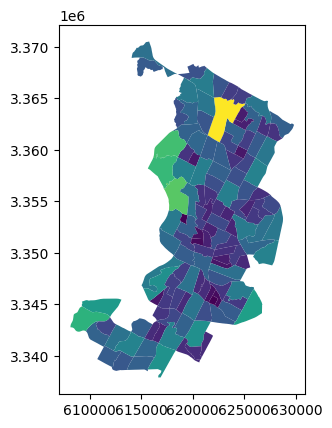

In [33]:
data.plot(column="area_km2")

<Axes: >

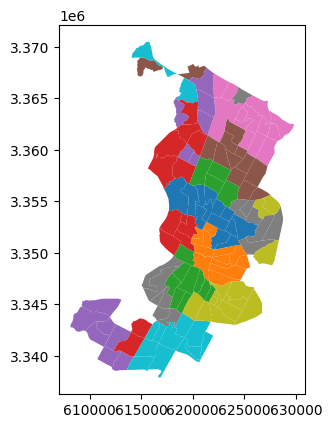

In [34]:
data.plot(column="tract")

In [35]:
data["pop_density_km2"] = data["pop2019"] / data["area_km2"]
data.head()

,pop2019,tract,geometry,area_km2,pop_density_km2
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3...",4.029772,1506.288769
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.33 33...",1.532030,1437.961408
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3...",3.960344,1873.322183
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3...",2.181762,1938.341868
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3...",2.431208,1887.538655


<Axes: >

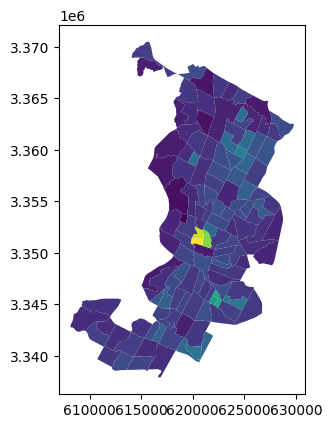

In [36]:
data.plot(column = "pop_density_km2")

In [37]:
data["pop_density_km2"].mean()

np.float64(2396.9319576508337)

In [38]:
data["pop_density_km2"].max()

np.float64(11323.842142217982)

In [39]:
data.to_file("data/temp/austin_pop_density_2019.gpkg")

In [40]:
data.to_file("data/temp/austin_pop_density_2019.fgb", driver="FlatGeobuf")

In [43]:
data2 = gpd.read_file('./data/temp/austin_pop_density_2019.fgb')
data2.head()

,pop2019,tract,area_km2,pop_density_km2,geometry
0,8590.0,002312,4.388407,1957.430308,"POLYGON ((623931.77 3343015.679, 623947.378 33..."
1,6165.0,002412,1.387965,4441.755260,"POLYGON ((619236.008 3340967.393, 619237.966 3..."
2,4945.0,002419,1.352836,3655.285069,"POLYGON ((618358.033 3340537.368, 618419.974 3..."
3,5045.0,002413,1.346096,3747.875857,"POLYGON ((620693.619 3340171.227, 620694.343 3..."
4,7419.0,002411,3.960344,1873.322183,"POLYGON ((619200.163 3341784.654, 619270.849 3..."


In [44]:
from zipfile import ZipFile

In [45]:
with ZipFile('data/Kamppi_layers.zip') as z:
  print(z.namelist())

['natural/', 'natural/Kamppi_parks.gpkg', 'built_environment/', 'built_environment/Kamppi_buildings.gpkg', 'built_environment/Kamppi_roads.gpkg']


In [47]:
parks = gpd.read_file('data/kamppi_layers.zip!natural/Kamppi_parks.gpkg')
parks.head()

,osmid,leisure,name,geometry
0,8042256,park,Pikkuparlamentin puisto,"POLYGON ((385464.223 6672281.159, 385464.274 6..."
1,8042613,park,Simonpuistikko,"POLYGON ((385532.543 6672073.355, 385490.887 6..."
2,15218362,park,Työmiehenpuistikko,"POLYGON ((384756.492 6671597.785, 384752.383 6..."
3,15218739,park,Lastenlehto,"POLYGON ((384987.028 6671675.962, 384987.13 66..."
4,15223911,park,Lapinlahden puistikko,"POLYGON ((385201.425 6671684.104, 385175.291 6..."


In [48]:
# converting text file into geoSeries
import pandas as pd

In [49]:
df = pd.read_csv('./data/airports.txt')

df.head()

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [50]:
df['geometry'] = gpd.points_from_xy(
  x = df.Longitude,
  y = df.Latitude
)

df.head()

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz,Type,Source,geometry
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports,POINT (145.392 -6.08169)
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports,POINT (145.789 -5.20708)
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports,POINT (144.29601 -5.82679)
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports,POINT (146.72598 -6.5698)
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports,POINT (147.22 -9.44338)


In [51]:
gdf = gpd.GeoDataFrame(df)
gdf.head()

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz,Type,Source,geometry
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports,POINT (145.392 -6.08169)
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports,POINT (145.789 -5.20708)
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports,POINT (144.29601 -5.82679)
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports,POINT (146.72598 -6.5698)
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports,POINT (147.22 -9.44338)


In [52]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [54]:
type(df)

pandas.core.frame.DataFrame

<Axes: >

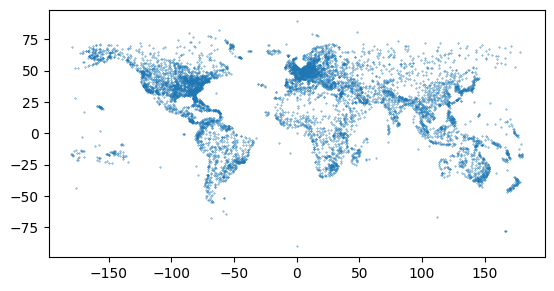

In [56]:
gdf.plot(markersize=0.1)